In [1]:
import pandas as pd
import os
import nltk
import string
import datetime as dt
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nltk.download()
string.punctuation

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [2]:
# Set path to cryptocurrency csv files
path = '../Data/Reddit_Comments/Cryptocurrency/'

files = os.listdir(path)

# Create list of csv file names
csv_list = []
for f in files:
    csv_list.append(f)

In [3]:
csv_list = csv_list[:-1]
csv_list

['Cryptocurrency_2021-08-07.csv',
 'Cryptocurrency_2021-08-08.csv',
 'Cryptocurrency_2021-08-09.csv',
 'Cryptocurrency_2021-08-10.csv',
 'Cryptocurrency_2021-08-11.csv',
 'Cryptocurrency_2021-08-12.csv',
 'Cryptocurrency_2021-08-13.csv',
 'Cryptocurrency_2021-08-14.csv',
 'Cryptocurrency_2021-08-15.csv',
 'Cryptocurrency_2021-08-16.csv',
 'Cryptocurrency_2021-08-17.csv',
 'Cryptocurrency_2021-08-18.csv',
 'Cryptocurrency_2021-08-19.csv',
 'Cryptocurrency_2021-08-20.csv',
 'Cryptocurrency_2021-08-21.csv',
 'Cryptocurrency_2021-08-22.csv',
 'Cryptocurrency_2021-08-23.csv',
 'Cryptocurrency_2021-08-24.csv',
 'Cryptocurrency_2021-08-25.csv',
 'Cryptocurrency_2021-08-26.csv',
 'Cryptocurrency_2021-08-27.csv',
 'Cryptocurrency_2021-08-28.csv',
 'Cryptocurrency_2021-08-29.csv',
 'Cryptocurrency_2021-08-30.csv',
 'Cryptocurrency_2021-08-31.csv',
 'Cryptocurrency_2021-09-01.csv',
 'Cryptocurrency_2021-09-02.csv',
 'Cryptocurrency_2021-09-03.csv',
 'Cryptocurrency_2021-09-04.csv',
 'Cryptocurren

In [4]:
csv_list[0]

'Cryptocurrency_2021-08-07.csv'

## Create new dataframe with average sentiment polarity scores for each day

In [5]:
# Create dataframe to populate with polarity data
scores_df = pd.DataFrame(columns = ['time', 'avg_positive', 'avg_neutral', 'avg_negative', 'avg_compound'])

num = 0

for x in csv_list:

    # Read csv file to dataframe
    df = pd.read_csv(path + x)
    
    # Remove all rows that have NaN in df['body']
    df = df[df['body'].notna()]

    # Remove automoderator authors
    df = df[df.author != "AutoModerator"]

    bitcoin_df = df[df['body'].str.contains('Bitcoin|BTC', case=False)]

    analyser = SentimentIntensityAnalyzer()

    # function to calculate polarity scores
    pol = lambda x: analyser.polarity_scores(x)

    # creating new column 'polarity' in clean_df
    bitcoin_df['polarity'] = bitcoin_df['body'].apply(pol)

    # Seperating out 'polarity' dictionary
    bitcoin_df = pd.concat([bitcoin_df, bitcoin_df['polarity'].apply(pd.Series)], axis=1)

    # Create datetime object from timestamp
    d = dt.datetime.fromtimestamp(int(bitcoin_df['created_utc'].iloc[0]))

    # Append new polarity scores to new row of dataframe
    scores_df.loc[num] = [str(d).split(' ', 1)[0], str(bitcoin_df['pos'].mean()), str(bitcoin_df['neu'].mean()), str(bitcoin_df['neg'].mean()),
                        str(bitcoin_df['compound'].mean())]

    num = int(num) + 1

    # print average polarity score for each label
    #print('The Date = ' + str(d).split(' ', 1)[0])
    #print('The average Positive score = ' + str(bitcoin_df['pos'].mean()))
    #print('The average Neutral score = ' + str(bitcoin_df['neu'].mean()))
    #print('The average Negative score = ' + str(bitcoin_df['neg'].mean()))
    #print('The average Compound score = ' + str(bitcoin_df['compound'].mean()))

<ipython-input-5-6d9916d7c1b4>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bitcoin_df['polarity'] = bitcoin_df['body'].apply(pol)
C:\Users\User1\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [47]:
scores_df.head()

,time,avg_positive,avg_neutral,avg_negative,avg_compound
0,2021-08-07,0.1009709364908503,0.8521111410118416,0.04691872981700745,0.1707172228202371
1,2021-08-08,0.10632985578398281,0.8473163547100339,0.04635931267259898,0.20326864068732767
2,2021-08-09,0.11035214552238769,0.8418934235074629,0.04775303171641789,0.19072880130597045
3,2021-08-10,0.10845975056689379,0.8407009637188193,0.05084183673469381,0.19104501133786833
4,2021-08-11,0.10580504201680675,0.8475826330532186,0.046621288515406166,0.21958767507002774


In [48]:
scores_df.shape

(32, 5)

In [49]:
scores_df.dtypes

time            datetime64[ns]
avg_positive            object
avg_neutral             object
avg_negative            object
avg_compound            object
dtype: object

## Import btc ticker prices

In [50]:
btc_df = pd.read_csv('../Data/Historical/BTC.csv')

In [51]:
# Make time column a series with dtype datetime64[ns]
btc_df['time'] = pd.to_datetime(btc_df['time'])

In [52]:
#greater than the start date and smaller than the end date
mask = (btc_df['time'] >= '2021-8-7T00:00') & (btc_df['time'] <= '2021-9-7T00:00')

In [53]:
mask_df = btc_df.loc[mask]

In [54]:
mask_df.reset_index(inplace = True, drop = True)

In [55]:
mask_df.head()

,time,low,high,open,close,volume
0,2021-08-07,42457.27,44750.00,42869.59,44637.34,19634.794756
1,2021-08-08,43131.97,45363.83,44628.11,43829.14,18712.271582
2,2021-08-09,42821.30,46497.42,43829.15,46285.48,19464.724935
3,2021-08-10,44650.27,46718.44,46280.00,45595.66,13756.500669
4,2021-08-11,45350.74,46781.09,45601.82,45553.49,11628.320440


In [56]:
mask_df.shape

(32, 6)

In [57]:
mask_df.dtypes

time      datetime64[ns]
low              float64
high             float64
open             float64
close            float64
volume           float64
dtype: object

## Merge Dataframes

In [58]:
# Convert time column to datetime
scores_df['time'] = pd.to_datetime(scores_df['time'])

In [72]:
df_merged = pd.merge(scores_df, mask_df, how='outer', on='time')

In [73]:
df_merged.head()

,time,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume
0,2021-08-07,0.1009709364908503,0.8521111410118416,0.04691872981700745,0.1707172228202371,42457.27,44750.00,42869.59,44637.34,19634.794756
1,2021-08-08,0.10632985578398281,0.8473163547100339,0.04635931267259898,0.20326864068732767,43131.97,45363.83,44628.11,43829.14,18712.271582
2,2021-08-09,0.11035214552238769,0.8418934235074629,0.04775303171641789,0.19072880130597045,42821.30,46497.42,43829.15,46285.48,19464.724935
3,2021-08-10,0.10845975056689379,0.8407009637188193,0.05084183673469381,0.19104501133786833,44650.27,46718.44,46280.00,45595.66,13756.500669
4,2021-08-11,0.10580504201680675,0.8475826330532186,0.046621288515406166,0.21958767507002774,45350.74,46781.09,45601.82,45553.49,11628.320440


In [74]:
df_merged.dtypes

time            datetime64[ns]
avg_positive            object
avg_neutral             object
avg_negative            object
avg_compound            object
low                    float64
high                   float64
open                   float64
close                  float64
volume                 float64
dtype: object

## Correlation Analysis

In [75]:
df_merged['avg_positive'] = df_merged['avg_positive'].astype(float, errors = 'raise')
df_merged['avg_neutral'] = df_merged['avg_neutral'].astype(float, errors = 'raise')
df_merged['avg_negative'] = df_merged['avg_negative'].astype(float, errors = 'raise')
df_merged['avg_compound'] = df_merged['avg_compound'].astype(float, errors = 'raise')

In [76]:
df_diff = df_merged.set_index('time').diff()
df_diff.head()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume
time,,,,,,,,,
2021-08-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-08,0.005359,-0.004795,-0.000559,0.032551,674.70,613.83,1758.52,-808.20,-922.523174
2021-08-09,0.004022,-0.005423,0.001394,-0.012540,-310.67,1133.59,-798.96,2456.34,752.453353
2021-08-10,-0.001892,-0.001192,0.003089,0.000316,1828.97,221.02,2450.85,-689.82,-5708.224266
2021-08-11,-0.002655,0.006882,-0.004221,0.028543,700.47,62.65,-678.18,-42.17,-2128.180229


In [64]:
df_time = df_merged['time']

In [65]:
df_time.head()

0   2021-08-07
1   2021-08-08
2   2021-08-09
3   2021-08-10
4   2021-08-11
Name: time, dtype: datetime64[ns]

In [77]:
df_merged.drop('time', axis=1, inplace=True)

In [78]:
df_merged.head()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume
0,0.100971,0.852111,0.046919,0.170717,42457.27,44750.00,42869.59,44637.34,19634.794756
1,0.106330,0.847316,0.046359,0.203269,43131.97,45363.83,44628.11,43829.14,18712.271582
2,0.110352,0.841893,0.047753,0.190729,42821.30,46497.42,43829.15,46285.48,19464.724935
3,0.108460,0.840701,0.050842,0.191045,44650.27,46718.44,46280.00,45595.66,13756.500669
4,0.105805,0.847583,0.046621,0.219588,45350.74,46781.09,45601.82,45553.49,11628.320440


In [79]:
df_merged.corr()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume
avg_positive,1.000000,-0.671187,-0.017340,0.620789,-0.022412,0.006025,-0.066486,0.088053,0.076980
avg_neutral,-0.671187,1.000000,-0.729537,-0.033712,0.045740,-0.346165,-0.337529,-0.089537,-0.331896
avg_negative,-0.017340,-0.729537,1.000000,-0.527146,-0.040927,0.461524,0.516742,0.039615,0.376934
avg_compound,0.620789,-0.033712,-0.527146,1.000000,0.248811,-0.074454,-0.089840,0.155084,-0.282408
low,-0.022412,0.045740,-0.040927,0.248811,1.000000,0.738928,0.719448,0.869154,-0.628230
high,0.006025,-0.346165,0.461524,-0.074454,0.738928,1.000000,0.928396,0.842501,-0.113928
open,-0.066486,-0.337529,0.516742,-0.089840,0.719448,0.928396,1.000000,0.688252,-0.147593
close,0.088053,-0.089537,0.039615,0.155084,0.869154,0.842501,0.688252,1.000000,-0.425622
volume,0.076980,-0.331896,0.376934,-0.282408,-0.628230,-0.113928,-0.147593,-0.425622,1.000000


In [80]:
df_diff.corr()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume
avg_positive,1.000000,-0.568642,-0.350503,0.628985,0.111005,-0.114814,-0.278188,0.298045,-0.140763
avg_neutral,-0.568642,1.000000,-0.571089,0.128017,0.416057,0.067126,0.027199,0.257340,-0.384209
avg_negative,-0.350503,-0.571089,1.000000,-0.773231,-0.584610,0.038678,0.246583,-0.590222,0.578193
avg_compound,0.628985,0.128017,-0.773231,1.000000,0.470981,-0.118692,-0.121407,0.369645,-0.474195
low,0.111005,0.416057,-0.584610,0.470981,1.000000,0.338487,0.337533,0.616022,-0.780500
high,-0.114814,0.067126,0.038678,-0.118692,0.338487,1.000000,0.363436,0.499230,0.095129
open,-0.278188,0.027199,0.246583,-0.121407,0.337533,0.363436,1.000000,-0.259855,-0.053963
close,0.298045,0.257340,-0.590222,0.369645,0.616022,0.499230,-0.259855,1.000000,-0.542782
volume,-0.140763,-0.384209,0.578193,-0.474195,-0.780500,0.095129,-0.053963,-0.542782,1.000000


In [82]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
 
crypto=pd.DataFrame(scaler.fit_transform(df_merged.values),
            columns=df_merged.columns, index=df_merged.index) 

print(crypto)

    avg_positive  avg_neutral  avg_negative  avg_compound       low      high  \
0       0.225582     1.000000      0.135263      0.252945  0.000000  0.000000   
1       0.638868     0.757063      0.104531      0.750540  0.078794  0.074903   
2       0.949071     0.482299      0.181096      0.558851  0.042513  0.213231   
3       0.803128     0.421881      0.350784      0.563684  0.256108  0.240201   
4       0.598394     0.770554      0.118923      1.000000  0.337911  0.247846   
5       0.519160     0.813386      0.127947      0.788448  0.146808  0.179861   
6       0.334399     0.871613      0.196703      0.352199  0.209320  0.390960   
7       0.671479     0.565909      0.288054      0.512729  0.417814  0.418125   
8       0.744552     0.655782      0.138899      0.744332  0.358284  0.323369   
9       0.477272     0.654938      0.330146      0.539967  0.376003  0.405923   
10      0.675825     0.525143      0.329273      0.537080  0.227509  0.295867   
11      0.609545     0.62201

In [85]:
crypto['time'] = df_time

In [86]:
crypto.head()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume,time
0,0.225582,1.000000,0.135263,0.252945,0.000000,0.000000,0.000000,0.091120,0.610893,2021-08-07
1,0.638868,0.757063,0.104531,0.750540,0.078794,0.074903,0.178908,0.000000,0.572657,2021-08-08
2,0.949071,0.482299,0.181096,0.558851,0.042513,0.213231,0.097623,0.276937,0.603844,2021-08-09
3,0.803128,0.421881,0.350784,0.563684,0.256108,0.240201,0.346967,0.199164,0.367255,2021-08-10
4,0.598394,0.770554,0.118923,1.000000,0.337911,0.247846,0.277970,0.194410,0.279048,2021-08-11


In [88]:
crypto.corr()

,avg_positive,avg_neutral,avg_negative,avg_compound,low,high,open,close,volume
avg_positive,1.000000,-0.671187,-0.017340,0.620789,-0.022412,0.006025,-0.066486,0.088053,0.076980
avg_neutral,-0.671187,1.000000,-0.729537,-0.033712,0.045740,-0.346165,-0.337529,-0.089537,-0.331896
avg_negative,-0.017340,-0.729537,1.000000,-0.527146,-0.040927,0.461524,0.516742,0.039615,0.376934
avg_compound,0.620789,-0.033712,-0.527146,1.000000,0.248811,-0.074454,-0.089840,0.155084,-0.282408
low,-0.022412,0.045740,-0.040927,0.248811,1.000000,0.738928,0.719448,0.869154,-0.628230
high,0.006025,-0.346165,0.461524,-0.074454,0.738928,1.000000,0.928396,0.842501,-0.113928
open,-0.066486,-0.337529,0.516742,-0.089840,0.719448,0.928396,1.000000,0.688252,-0.147593
close,0.088053,-0.089537,0.039615,0.155084,0.869154,0.842501,0.688252,1.000000,-0.425622
volume,0.076980,-0.331896,0.376934,-0.282408,-0.628230,-0.113928,-0.147593,-0.425622,1.000000


## Plot Heatmap

In [89]:
!pip install heatmapz

In [90]:
from heatmap import heatmap, corrplot

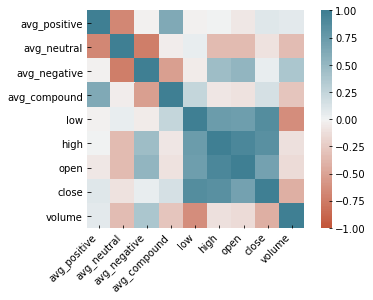

In [91]:
corr = crypto.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Seaborn Factorplot

C:\Users\User1\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


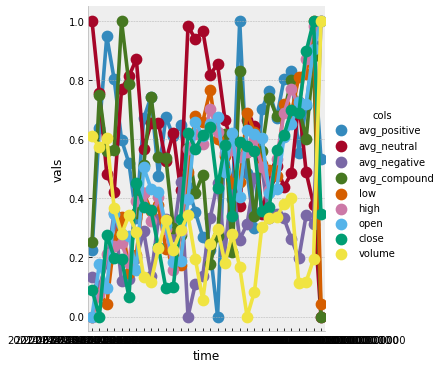

In [87]:
import seaborn as sns

melt_df = crypto.melt('time', var_name='cols',  value_name='vals')
g = sns.factorplot(x="time", y="vals", hue='cols', data=melt_df)